# DATA 620 Project 1

## Authors: John Mazon, LeTicia Cancel, Bharani Nittala

**Introduction**

For this project we were asked to:
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Hypothesis:

Our dataset consists of tv shows and moves available on Netflix as of 2019 from Kaggle https://www.kaggle.com/shivamb/netflix-shows. The dataset can be leveraged to measure degree centrality by the nodes such as TV shows and Movies. It will be interesting to see how the data differs between the two popular content types (such as TV shows and Movies).

In [ ]:
Import libraries

In [8]:
import pandas as pd
import networkx as nx

**Load Netflix Data**
The data is imported from the csv file stored on GitHub. The data consists of all TV Shows and Movies available on Netflix. We will use the data points release_year and rating in our analysis. 

In [9]:
data = pd.read_csv("https://github.com/ltcancel/DATA620/raw/main/Project1/netflix_titles.csv")

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Filer Data**
We filtered the data into 2 categorical groups, Domestic vs International. 

In [11]:
df_domestic = data[data['country'] == 'United States']
df_inter = data[data['country'] != 'United States']

In [97]:
df_domestic.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [98]:
df_inter.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


**Graphs**
The first graph will be for the Domestic movies and tv shows

In [104]:
#g = nx.from_pandas_edgelist(data, 'release_year', 'rating')
g_dom = nx.from_pandas_edgelist(df_domestic, 'release_year', 'rating')

In [107]:
print('Edges and Nodes for Domestic')
print('Number of nodes of the graph: ',g_dom.order())
print('Number of edges of the graph: ',g_dom.size())

Edge and Nodes for Domestic
Number of nodes of the graph:  82
Number of edges of the graph:  307


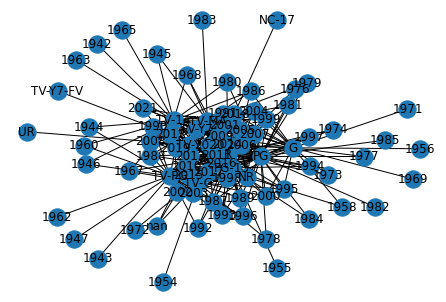

In [110]:
nx.draw(g_dom, with_labels=True)

The second graph will be for the International movies and tv shows

In [108]:
g_inter = nx.from_pandas_edgelist(df_inter, 'release_year', 'rating')

In [109]:
print('Edges and Nodes for Domestic')
print('Number of nodes of the graph: ',g_inter.order())
print('Number of edges of the graph: ',g_inter.size())

Edges and Nodes for Domestic
Number of nodes of the graph:  83
Number of edges of the graph:  345


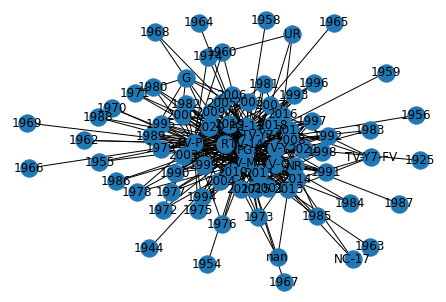

In [111]:
nx.draw(g_inter, with_labels=True)

Degree of centrality

In [79]:
eig = nx.eigenvector_centrality(g).values()
cent = nx.degree_centrality(g).values()
btw_cent = nx.betweenness_centrality(g).values()
close_cent = nx.closeness_centrality(g).values()

In [96]:
data_tuples = list(zip(eig, cent, btw_cent, close_cent))
table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
table.index = list(g)
table.head()

,Eigenvector,Degree,Betweenness,Closeness
2020,0.118923,0.114943,0.004543,0.514793
TV-MA,0.266129,0.597701,0.114492,0.608392
2016,0.128892,0.149425,0.016949,0.533742
2011,0.125588,0.126437,0.005670,0.520958
R,0.256031,0.551724,0.084928,0.576159


TypeError: 'dict_values' object is not subscriptable

RuntimeError: dictionary changed size during iteration